 One of the main important factors for successful flight of aircrafts,
airships, aerostats etc.. is to analyze and maintain the temperatures and pressures. 
For this accuracy analysis,we need to collect data of previously launched sounding rockets 
temperatures at different seasons and needed to be compared with standard MSIS100 model data. 
The temperatures are collected and compared in 'centigrade' and the data is collected at 
stratosphere region i.e; below 100km. Here, i conduct data visualization between 20-60km,
that is stratosphere region with step size 5. so i got 9 values for each season Here, i have
calculated accuracy of sounding rocket temperature data by maximum deviation and standard deviation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
datafile=pd.read_csv('../input/sounding-rocket-and-msis-temperature-dataset/Sounding rocket temperature data analysis.csv')
df=datafile


In [2]:
#Here i want view the datatable which contain data belonging to spring season
df.head(9)

,Sno,Season,Heights,TempMSIS,RocketTemp
0,1,spring,20,-60.25,-60.21
1,2,spring,25,-52.45,-49.00
2,3,spring,30,-45.25,-48.00
3,4,spring,35,-32.35,-39.20
4,5,spring,40,-15.35,-30.00
5,6,spring,45,-4.15,-19.00
6,7,spring,50,-8.05,-15.00
7,8,spring,55,-25.00,-17.00
8,9,spring,60,-36.00,-28.00


In [3]:
#I took data in order as spring, summer, autumn and winter and each season constituting data at nine different hights 
#now i want to view the data belonging to last winter season
df.tail(9)

,Sno,Season,Heights,TempMSIS,RocketTemp
27,28,winter,20,-59.0,-61.5
28,29,winter,25,-53.8,-54.0
29,30,winter,30,-47.0,-44.0
30,31,winter,35,-37.1,-37.3
31,32,winter,40,-22.1,-22.2
32,33,winter,45,-12.3,-12.3
33,34,winter,50,-18.2,-10.8
34,35,winter,55,-29.4,-20.1
35,36,winter,60,-38.0,-35.2


In [4]:
#now calculating the difference in temperatures and adding this column to datatable
df['Tempdiff']=(df['RocketTemp']-df['TempMSIS'])

In [5]:
#let us check whether new column is added
df.head(9)

,Sno,Season,Heights,TempMSIS,RocketTemp,Tempdiff
0,1,spring,20,-60.25,-60.21,0.04
1,2,spring,25,-52.45,-49.00,3.45
2,3,spring,30,-45.25,-48.00,-2.75
3,4,spring,35,-32.35,-39.20,-6.85
4,5,spring,40,-15.35,-30.00,-14.65
5,6,spring,45,-4.15,-19.00,-14.85
6,7,spring,50,-8.05,-15.00,-6.95
7,8,spring,55,-25.00,-17.00,8.00
8,9,spring,60,-36.00,-28.00,8.00


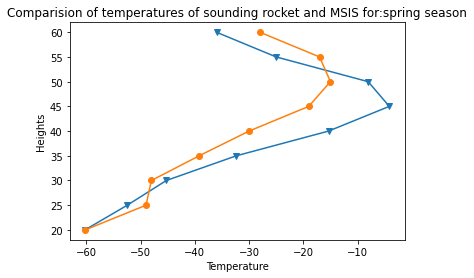

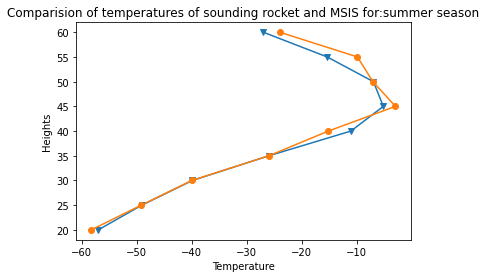

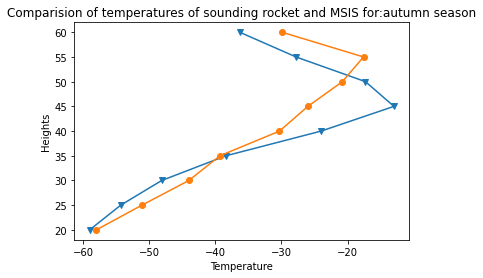

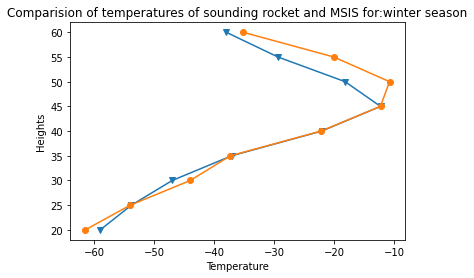

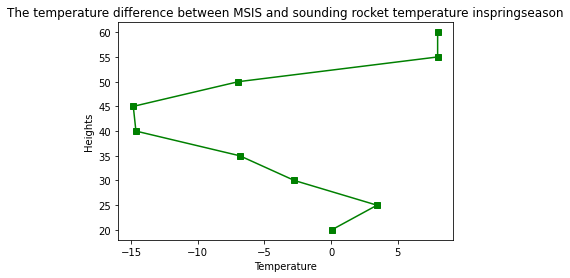

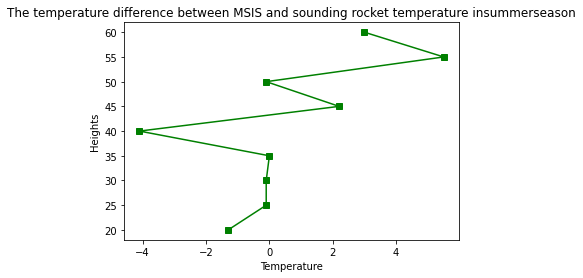

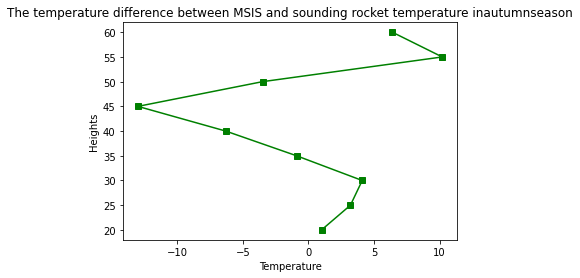

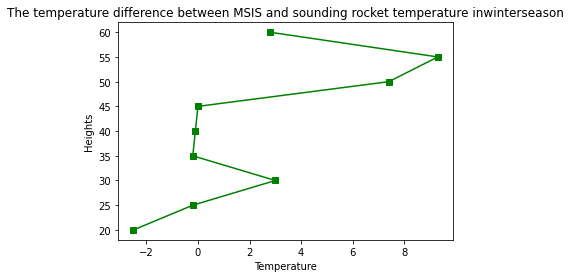

In [6]:
#Here iam plotting,sounding rocket temperature data and MSIS standard reference empirical model data at a specific season.
seasons = df['Season'].unique()
for ss in seasons:
    plt.title("Comparision of temperatures of sounding rocket and MSIS for:"+ss +" season")
    plt.plot(df.loc[df['Season']==ss,'TempMSIS'],df.loc[df['Season']==ss,'Heights'],linestyle='-', marker='v')
    plt.plot(df.loc[df['Season']==ss,'RocketTemp'],df.loc[df['Season']==ss,'Heights'],linestyle='-', marker='o')
    plt.xlabel("Temperature")
    plt.ylabel("Heights")
    plt.show()
#After comparing the values of both tempartures i want to plot the temperature difference between standard reference data and rocket data
for ss in seasons:
    plt.title("The temperature difference between MSIS and sounding rocket temperature in"+ss+'season')
    plt.plot(df.loc[df['Season']==ss,'Tempdiff'],df.loc[df['Season']==ss,'Heights'],'g',linestyle='-', marker='s')
    plt.xlabel('Temperature')
    plt.ylabel('Heights')
    plt.show()

In [7]:
#now iam creating two more columns which are more important for accurate temperature analysis these are, mean deviation and standard deviation.
import math
df['mean']=df['Tempdiff']/9
df['standard deviation']=((df['Tempdiff']**2)/9)**0.5

In [8]:
#now i want see the mean and standard deviation columns for spring season
df.head(9)

,Sno,Season,Heights,TempMSIS,RocketTemp,Tempdiff,mean,standard deviation
0,1,spring,20,-60.25,-60.21,0.04,0.004444,0.013333
1,2,spring,25,-52.45,-49.00,3.45,0.383333,1.150000
2,3,spring,30,-45.25,-48.00,-2.75,-0.305556,0.916667
3,4,spring,35,-32.35,-39.20,-6.85,-0.761111,2.283333
4,5,spring,40,-15.35,-30.00,-14.65,-1.627778,4.883333
5,6,spring,45,-4.15,-19.00,-14.85,-1.650000,4.950000
6,7,spring,50,-8.05,-15.00,-6.95,-0.772222,2.316667
7,8,spring,55,-25.00,-17.00,8.00,0.888889,2.666667
8,9,spring,60,-36.00,-28.00,8.00,0.888889,2.666667


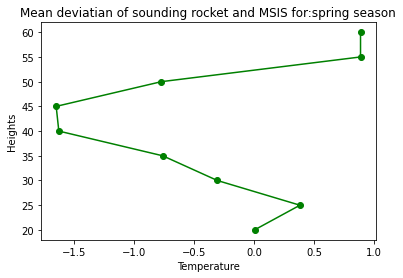

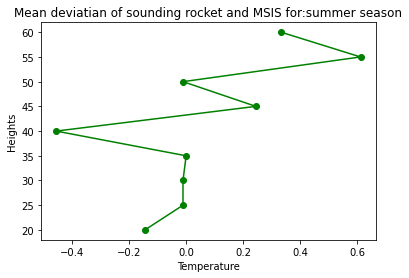

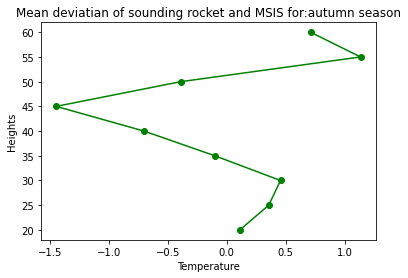

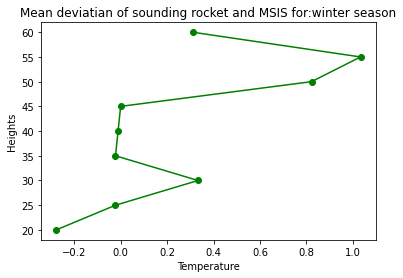

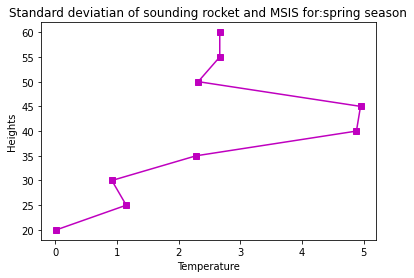

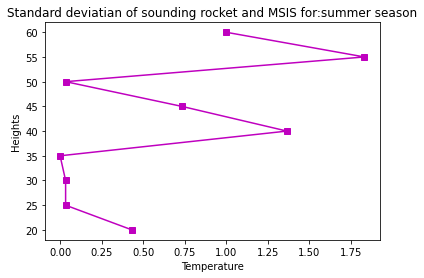

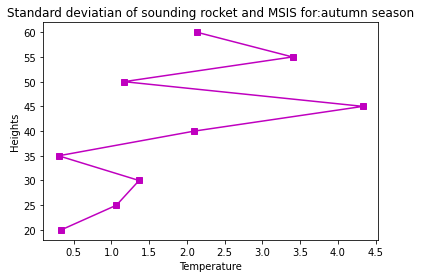

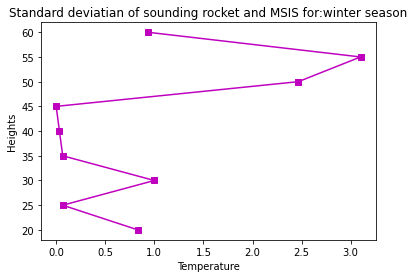

In [9]:
#Here iam plotting mean and standard deviation
def particulars(p1,str,clr,m):
    seasons = df['Season'].unique()
    for ss in seasons:
        plt.title(str+" deviatian of sounding rocket and MSIS for:"+ss +" season")
        plt.plot(df.loc[df['Season']==ss,p1],df.loc[df['Season']==ss,'Heights'],clr,linestyle='-', marker=m)
        plt.xlabel("Temperature")
        plt.ylabel("Heights")
        plt.show()
x1,x2,str1,str2,clr1,clr2,m1,m2='mean','standard deviation','Mean','Standard','g','m','o','s'
plt.title("Mean deviatian of sounding rocket and MSIS for:"+ss +" season")
particulars(x1,str1,clr1,m1)
plt.title("Standard deviatian of sounding rocket and MSIS for:"+ss +" season")
particulars(x2,str2,clr2,m2)

In order to analyze temperatures of all seasons i need to check, in which season there occures maximum deviation and minimum deviation so i plot standard deviation of all seasons and mean deviation of all seasons

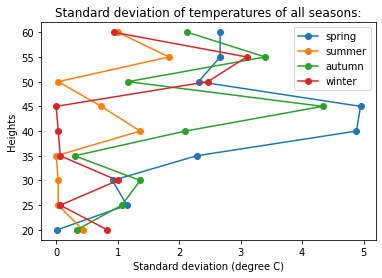

In [10]:
# plotting standard deviation of all seasons
seasons = df['Season'].unique()
c=0
i=0
for ss in seasons:
    plt.title("Standard deviation of temperatures of all seasons:")
    plt.plot(df.loc[df['Season']==ss,'standard deviation'],df.loc[df['Season']==ss,'Heights'],label=seasons[i],linestyle='-', marker='o')
    c=c+1
    if(c>=1 and i<3):
        i=i+1
        c=0
    plt.xlabel("Standard deviation (degree C)")
    plt.ylabel("Heights")
    plt.legend()

From this we can observe that order of increasing deviations is summer, winter and then autumn followed by spring.

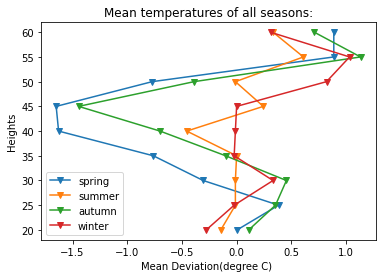

In [11]:
#Plotting mean temperatures and viewing its deviations of temperatures from 0 degree centigrade of all seasons.
season = df['Season'].unique()
c=0
i=0
for ss in season:
    plt.title("Mean temperatures of all seasons:")
    plt.plot(df.loc[df['Season']==ss,'mean'],df.loc[df['Season']==ss,'Heights'],label=season[i],linestyle='-', marker='v')
    c=c+1
    if(c>=1 and i<3):
        i=i+1
        c=0
    plt.xlabel("Mean Deviation(degree C) ")
    plt.ylabel("Heights")
    plt.legend()

From this we can observe that, summer is having a higher goodness fit, where there is a minimum deviation.followed by winter than spring.